In [1]:
import sys 
sys.path.append("C:/Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries")
import training_rf_xgb_models as trainer
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import pickle 

In [2]:
pd.read_csv('data/currated/testing_data_daily_currated_20241015_20241215.csv').columns

Index(['Unnamed: 0', 'purchase_date', 'sku', 'sell_qty', 'business_order',
       'per_unit_cost', 'cap', 'floor'],
      dtype='object')

In [3]:
# Loading training,testing and skus
train_df, test_df,prod, current_skus = trainer.load_data(create_test_train_split = False) 
# generating models for the skus in current_skus 
xgbmodels = {sku : trainer.train_models_advanced(train_data = train_df, type = prod[prod['sku']==sku]['type'].iloc[0],price =  prod[prod['sku']==sku]['per_unit_cost'].iloc[0],split =True) for sku in current_skus }


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:55: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  prod = cu.clean_prod(pd.read_csv('data/raw/prod.csv'))


[0]	train-rmse:1.32646	eval-rmse:0.46114


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[1]	train-rmse:1.23558	eval-rmse:0.43905
[2]	train-rmse:1.15449	eval-rmse:0.42165
[3]	train-rmse:1.08381	eval-rmse:0.40563
[4]	train-rmse:1.02068	eval-rmse:0.39255
[5]	train-rmse:0.96529	eval-rmse:0.38082
[6]	train-rmse:0.91352	eval-rmse:0.37005
[7]	train-rmse:0.86796	eval-rmse:0.36181
[8]	train-rmse:0.82850	eval-rmse:0.35515
[9]	train-rmse:0.79423	eval-rmse:0.34919
[10]	train-rmse:0.76432	eval-rmse:0.34454
[11]	train-rmse:0.73732	eval-rmse:0.34075
[12]	train-rmse:0.71503	eval-rmse:0.33624
[13]	train-rmse:0.69442	eval-rmse:0.33272
[14]	train-rmse:0.67514	eval-rmse:0.32968
[15]	train-rmse:0.65859	eval-rmse:0.32746
[16]	train-rmse:0.64385	eval-rmse:0.32578
[17]	train-rmse:0.63131	eval-rmse:0.32397
[18]	train-rmse:0.61676	eval-rmse:0.32263
[19]	train-rmse:0.60735	eval-rmse:0.32150
[20]	train-rmse:0.59536	eval-rmse:0.32045
[21]	train-rmse:0.58573	eval-rmse:0.31952
[22]	train-rmse:0.57829	eval-rmse:0.31836
[23]	train-rmse:0.57044	eval-rmse:0.31739
[24]	train-rmse:0.56366	eval-rmse:0.31635
[

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[0]	train-rmse:0.93964	eval-rmse:1.16430
[1]	train-rmse:0.88247	eval-rmse:1.12933
[2]	train-rmse:0.83228	eval-rmse:1.07008
[3]	train-rmse:0.78827	eval-rmse:1.02046
[4]	train-rmse:0.75012	eval-rmse:0.97513
[5]	train-rmse:0.71617	eval-rmse:0.93853
[6]	train-rmse:0.68499	eval-rmse:0.90598
[7]	train-rmse:0.65958	eval-rmse:0.87854
[8]	train-rmse:0.63723	eval-rmse:0.84609
[9]	train-rmse:0.61712	eval-rmse:0.84302
[10]	train-rmse:0.60031	eval-rmse:0.82305
[11]	train-rmse:0.58551	eval-rmse:0.80775
[12]	train-rmse:0.57212	eval-rmse:0.77243
[13]	train-rmse:0.56001	eval-rmse:0.76816
[14]	train-rmse:0.55000	eval-rmse:0.75792
[15]	train-rmse:0.54025	eval-rmse:0.73614
[16]	train-rmse:0.53271	eval-rmse:0.73096
[17]	train-rmse:0.52472	eval-rmse:0.72670
[18]	train-rmse:0.51778	eval-rmse:0.72200
[19]	train-rmse:0.51195	eval-rmse:0.72164
[20]	train-rmse:0.50719	eval-rmse:0.71633
[21]	train-rmse:0.50320	eval-rmse:0.71425
[22]	train-rmse:0.49930	eval-rmse:0.71324
[23]	train-rmse:0.49504	eval-rmse:0.71172
[2

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_std_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).std().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna(0, inplace=True)  # Handling missing values


[27]	train-rmse:0.48235	eval-rmse:0.71136
[28]	train-rmse:0.48022	eval-rmse:0.71116
[29]	train-rmse:0.47698	eval-rmse:0.71183
[30]	train-rmse:0.47291	eval-rmse:0.71199
[31]	train-rmse:0.46973	eval-rmse:0.71248
[32]	train-rmse:0.46656	eval-rmse:0.71257
[33]	train-rmse:0.46380	eval-rmse:0.71331
[34]	train-rmse:0.46145	eval-rmse:0.71368
[35]	train-rmse:0.45918	eval-rmse:0.71438
[36]	train-rmse:0.45757	eval-rmse:0.71442
[37]	train-rmse:0.45603	eval-rmse:0.71458
[38]	train-rmse:0.45451	eval-rmse:0.71459
[39]	train-rmse:0.45332	eval-rmse:0.71520
[40]	train-rmse:0.45279	eval-rmse:0.71500
[41]	train-rmse:0.45064	eval-rmse:0.71544
[42]	train-rmse:0.45018	eval-rmse:0.71532
[43]	train-rmse:0.44954	eval-rmse:0.71551
[44]	train-rmse:0.44916	eval-rmse:0.71540
[45]	train-rmse:0.44864	eval-rmse:0.71518
[46]	train-rmse:0.44810	eval-rmse:0.71520
[47]	train-rmse:0.44776	eval-rmse:0.71514
[48]	train-rmse:0.44709	eval-rmse:0.71507
[49]	train-rmse:0.44567	eval-rmse:0.71525
[50]	train-rmse:0.44476	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[25]	train-rmse:0.64742	eval-rmse:0.44306
[26]	train-rmse:0.63775	eval-rmse:0.44253
[27]	train-rmse:0.62962	eval-rmse:0.44213
[28]	train-rmse:0.61922	eval-rmse:0.44208
[29]	train-rmse:0.61074	eval-rmse:0.44214
[30]	train-rmse:0.60394	eval-rmse:0.44178
[31]	train-rmse:0.59547	eval-rmse:0.44180
[32]	train-rmse:0.58719	eval-rmse:0.44133
[33]	train-rmse:0.58100	eval-rmse:0.44125
[34]	train-rmse:0.57552	eval-rmse:0.44127
[35]	train-rmse:0.56991	eval-rmse:0.44124
[36]	train-rmse:0.56479	eval-rmse:0.44119
[37]	train-rmse:0.55859	eval-rmse:0.44123
[38]	train-rmse:0.55434	eval-rmse:0.44105
[39]	train-rmse:0.55128	eval-rmse:0.44104
[40]	train-rmse:0.54723	eval-rmse:0.44105
[41]	train-rmse:0.54094	eval-rmse:0.44089
[42]	train-rmse:0.53591	eval-rmse:0.44087
[43]	train-rmse:0.53225	eval-rmse:0.44088
[44]	train-rmse:0.52726	eval-rmse:0.44089
[45]	train-rmse:0.52536	eval-rmse:0.44163
[46]	train-rmse:0.52008	eval-rmse:0.44149
[47]	train-rmse:0.51707	eval-rmse:0.44157
[48]	train-rmse:0.51586	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[0]	train-rmse:0.91249	eval-rmse:3.70535
[1]	train-rmse:0.84096	eval-rmse:3.58264
[2]	train-rmse:0.77587	eval-rmse:3.48386
[3]	train-rmse:0.71696	eval-rmse:3.40740
[4]	train-rmse:0.66354	eval-rmse:3.33570
[5]	train-rmse:0.61530	eval-rmse:3.28147
[6]	train-rmse:0.57120	eval-rmse:3.23088
[7]	train-rmse:0.53194	eval-rmse:3.18758
[8]	train-rmse:0.49595	eval-rmse:3.15029
[9]	train-rmse:0.46365	eval-rmse:3.11979
[10]	train-rmse:0.43541	eval-rmse:3.04585
[11]	train-rmse:0.41006	eval-rmse:2.98200
[12]	train-rmse:0.38727	eval-rmse:2.90090
[13]	train-rmse:0.36700	eval-rmse:2.85621
[14]	train-rmse:0.34841	eval-rmse:2.79168
[15]	train-rmse:0.33182	eval-rmse:2.73725
[16]	train-rmse:0.31683	eval-rmse:2.70948
[17]	train-rmse:0.30334	eval-rmse:2.67380
[18]	train-rmse:0.29096	eval-rmse:2.64468
[19]	train-rmse:0.27991	eval-rmse:2.61979
[20]	train-rmse:0.26820	eval-rmse:2.59621
[21]	train-rmse:0.25766	eval-rmse:2.57750
[22]	train-rmse:0.24928	eval-rmse:2.56031
[23]	train-rmse:0.24079	eval-rmse:2.54726
[2

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[78]	train-rmse:0.14607	eval-rmse:2.45979
[79]	train-rmse:0.14552	eval-rmse:2.45988
[80]	train-rmse:0.14494	eval-rmse:2.45987
[81]	train-rmse:0.14389	eval-rmse:2.45993
[82]	train-rmse:0.14297	eval-rmse:2.45983
[83]	train-rmse:0.14252	eval-rmse:2.45977
[84]	train-rmse:0.14201	eval-rmse:2.46010
[85]	train-rmse:0.14175	eval-rmse:2.46003
[86]	train-rmse:0.14104	eval-rmse:2.46034
[87]	train-rmse:0.14050	eval-rmse:2.46044
[88]	train-rmse:0.13924	eval-rmse:2.46040
[89]	train-rmse:0.13826	eval-rmse:2.46039
[90]	train-rmse:0.13805	eval-rmse:2.46044
[91]	train-rmse:0.13753	eval-rmse:2.46052
[92]	train-rmse:0.13737	eval-rmse:2.46053
[93]	train-rmse:0.13689	eval-rmse:2.46051
[94]	train-rmse:0.13596	eval-rmse:2.46055
[95]	train-rmse:0.13513	eval-rmse:2.46027
[96]	train-rmse:0.13469	eval-rmse:2.45985
[97]	train-rmse:0.13361	eval-rmse:2.46028
[98]	train-rmse:0.13285	eval-rmse:2.46042
[99]	train-rmse:0.13261	eval-rmse:2.46035
[100]	train-rmse:0.13188	eval-rmse:2.46063
[101]	train-rmse:0.13166	eval-rms

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[30]	train-rmse:0.54419	eval-rmse:0.28581
[31]	train-rmse:0.53637	eval-rmse:0.28565
[32]	train-rmse:0.52972	eval-rmse:0.28550
[33]	train-rmse:0.52379	eval-rmse:0.28559
[34]	train-rmse:0.51927	eval-rmse:0.28577
[35]	train-rmse:0.51196	eval-rmse:0.28575
[36]	train-rmse:0.50704	eval-rmse:0.28568
[37]	train-rmse:0.50278	eval-rmse:0.28560
[38]	train-rmse:0.49698	eval-rmse:0.28555
[39]	train-rmse:0.49261	eval-rmse:0.28585
[40]	train-rmse:0.48886	eval-rmse:0.28580
[41]	train-rmse:0.48614	eval-rmse:0.28567
[42]	train-rmse:0.48171	eval-rmse:0.28562
[43]	train-rmse:0.47884	eval-rmse:0.28553
[44]	train-rmse:0.47445	eval-rmse:0.28554
[45]	train-rmse:0.47253	eval-rmse:0.28546
[46]	train-rmse:0.47080	eval-rmse:0.28544
[47]	train-rmse:0.46745	eval-rmse:0.28545
[48]	train-rmse:0.46531	eval-rmse:0.28545
[49]	train-rmse:0.46327	eval-rmse:0.28538
[50]	train-rmse:0.46235	eval-rmse:0.28518
[51]	train-rmse:0.45918	eval-rmse:0.28519
[52]	train-rmse:0.45781	eval-rmse:0.28520
[53]	train-rmse:0.45716	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[0]	train-rmse:0.86822	eval-rmse:1.09067
[1]	train-rmse:0.81271	eval-rmse:1.04061
[2]	train-rmse:0.76406	eval-rmse:0.99011
[3]	train-rmse:0.72094	eval-rmse:0.95348
[4]	train-rmse:0.68338	eval-rmse:0.91378
[5]	train-rmse:0.65014	eval-rmse:0.88021
[6]	train-rmse:0.62107	eval-rmse:0.85114
[7]	train-rmse:0.59568	eval-rmse:0.83032
[8]	train-rmse:0.57349	eval-rmse:0.81252
[9]	train-rmse:0.55449	eval-rmse:0.79272
[10]	train-rmse:0.53594	eval-rmse:0.77924
[11]	train-rmse:0.52000	eval-rmse:0.77883
[12]	train-rmse:0.50590	eval-rmse:0.77905
[13]	train-rmse:0.49300	eval-rmse:0.78180
[14]	train-rmse:0.48168	eval-rmse:0.77329
[15]	train-rmse:0.47211	eval-rmse:0.76394
[16]	train-rmse:0.46399	eval-rmse:0.75861
[17]	train-rmse:0.45677	eval-rmse:0.75993
[18]	train-rmse:0.44927	eval-rmse:0.75456
[19]	train-rmse:0.44372	eval-rmse:0.74939
[20]	train-rmse:0.43853	eval-rmse:0.74732
[21]	train-rmse:0.43407	eval-rmse:0.74323
[22]	train-rmse:0.42989	eval-rmse:0.74100
[23]	train-rmse:0.42454	eval-rmse:0.73667
[2

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_std_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).std().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna(0, inplace=True)  # Handling missing values


[26]	train-rmse:0.41163	eval-rmse:0.72891
[27]	train-rmse:0.40882	eval-rmse:0.72813
[28]	train-rmse:0.40531	eval-rmse:0.72665
[29]	train-rmse:0.40212	eval-rmse:0.72586
[30]	train-rmse:0.39893	eval-rmse:0.72489
[31]	train-rmse:0.39592	eval-rmse:0.72417
[32]	train-rmse:0.39357	eval-rmse:0.72258
[33]	train-rmse:0.39129	eval-rmse:0.72126
[34]	train-rmse:0.38897	eval-rmse:0.72180
[35]	train-rmse:0.38555	eval-rmse:0.72104
[36]	train-rmse:0.38293	eval-rmse:0.71992
[37]	train-rmse:0.38045	eval-rmse:0.71905
[38]	train-rmse:0.37875	eval-rmse:0.71916
[39]	train-rmse:0.37744	eval-rmse:0.71945
[40]	train-rmse:0.37580	eval-rmse:0.71965
[41]	train-rmse:0.37327	eval-rmse:0.71863
[42]	train-rmse:0.37094	eval-rmse:0.71898
[43]	train-rmse:0.36974	eval-rmse:0.71854
[44]	train-rmse:0.36795	eval-rmse:0.71839
[45]	train-rmse:0.36763	eval-rmse:0.71837
[46]	train-rmse:0.36735	eval-rmse:0.71786
[47]	train-rmse:0.36671	eval-rmse:0.71813
[48]	train-rmse:0.36617	eval-rmse:0.71813
[49]	train-rmse:0.36514	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[12]	train-rmse:0.75935	eval-rmse:0.51420
[13]	train-rmse:0.74110	eval-rmse:0.51905
[14]	train-rmse:0.72554	eval-rmse:0.52585
[15]	train-rmse:0.71152	eval-rmse:0.52974
[16]	train-rmse:0.69810	eval-rmse:0.53277
[17]	train-rmse:0.68644	eval-rmse:0.53782
[18]	train-rmse:0.67349	eval-rmse:0.54164
[19]	train-rmse:0.66239	eval-rmse:0.54589
[20]	train-rmse:0.65281	eval-rmse:0.55121
[21]	train-rmse:0.64328	eval-rmse:0.55457
[22]	train-rmse:0.63548	eval-rmse:0.55924
[23]	train-rmse:0.62667	eval-rmse:0.56301
[24]	train-rmse:0.62065	eval-rmse:0.56646
[25]	train-rmse:0.61272	eval-rmse:0.56862
[26]	train-rmse:0.60788	eval-rmse:0.57214
[27]	train-rmse:0.60369	eval-rmse:0.57469
[28]	train-rmse:0.59723	eval-rmse:0.57841
[29]	train-rmse:0.59191	eval-rmse:0.58061
[30]	train-rmse:0.58762	eval-rmse:0.58546
[31]	train-rmse:0.58204	eval-rmse:0.58992
[32]	train-rmse:0.57672	eval-rmse:0.59119
[33]	train-rmse:0.57209	eval-rmse:0.59533
[34]	train-rmse:0.56724	eval-rmse:0.59638
[35]	train-rmse:0.56324	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[50]	train-rmse:0.30914	eval-rmse:0.30607
[51]	train-rmse:0.30651	eval-rmse:0.30456
[52]	train-rmse:0.30453	eval-rmse:0.30308
[53]	train-rmse:0.30302	eval-rmse:0.30181
[54]	train-rmse:0.30111	eval-rmse:0.30067
[55]	train-rmse:0.29925	eval-rmse:0.30114
[56]	train-rmse:0.29806	eval-rmse:0.30137
[57]	train-rmse:0.29695	eval-rmse:0.30157
[58]	train-rmse:0.29582	eval-rmse:0.30158
[59]	train-rmse:0.29358	eval-rmse:0.30183
[60]	train-rmse:0.29259	eval-rmse:0.30069
[61]	train-rmse:0.29085	eval-rmse:0.29926
[62]	train-rmse:0.29002	eval-rmse:0.29767
[63]	train-rmse:0.28887	eval-rmse:0.29804
[64]	train-rmse:0.28817	eval-rmse:0.29870
[65]	train-rmse:0.28706	eval-rmse:0.29902
[66]	train-rmse:0.28647	eval-rmse:0.29917
[67]	train-rmse:0.28548	eval-rmse:0.29930
[68]	train-rmse:0.28484	eval-rmse:0.29930
[69]	train-rmse:0.28420	eval-rmse:0.29956
[70]	train-rmse:0.28310	eval-rmse:0.29813
[71]	train-rmse:0.28013	eval-rmse:0.29849
[72]	train-rmse:0.27875	eval-rmse:0.29840
[73]	train-rmse:0.27599	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[25]	train-rmse:0.57120	eval-rmse:0.27297
[26]	train-rmse:0.56234	eval-rmse:0.27291
[27]	train-rmse:0.55596	eval-rmse:0.27279
[28]	train-rmse:0.54762	eval-rmse:0.27275
[29]	train-rmse:0.53897	eval-rmse:0.27326
[30]	train-rmse:0.53179	eval-rmse:0.27328
[31]	train-rmse:0.52193	eval-rmse:0.27328
[32]	train-rmse:0.51370	eval-rmse:0.27327
[33]	train-rmse:0.50683	eval-rmse:0.27339
[34]	train-rmse:0.50040	eval-rmse:0.27326
[35]	train-rmse:0.49427	eval-rmse:0.27325
[36]	train-rmse:0.48845	eval-rmse:0.27316
[37]	train-rmse:0.48351	eval-rmse:0.27309
[38]	train-rmse:0.47864	eval-rmse:0.27309
[39]	train-rmse:0.47499	eval-rmse:0.27325
[40]	train-rmse:0.47000	eval-rmse:0.27315
[41]	train-rmse:0.46588	eval-rmse:0.27310
[42]	train-rmse:0.46165	eval-rmse:0.27308
[43]	train-rmse:0.45987	eval-rmse:0.27309
[44]	train-rmse:0.45630	eval-rmse:0.27306
[45]	train-rmse:0.45456	eval-rmse:0.27307
[46]	train-rmse:0.45186	eval-rmse:0.27307
[47]	train-rmse:0.45027	eval-rmse:0.27310
[48]	train-rmse:0.44879	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[0]	train-rmse:0.96555	eval-rmse:1.18203
[1]	train-rmse:0.90529	eval-rmse:1.10956
[2]	train-rmse:0.85202	eval-rmse:1.04146
[3]	train-rmse:0.80492	eval-rmse:0.98615
[4]	train-rmse:0.76354	eval-rmse:0.94163
[5]	train-rmse:0.72646	eval-rmse:0.90830
[6]	train-rmse:0.69292	eval-rmse:0.87984
[7]	train-rmse:0.66266	eval-rmse:0.85399
[8]	train-rmse:0.63568	eval-rmse:0.83372
[9]	train-rmse:0.61193	eval-rmse:0.81323
[10]	train-rmse:0.59086	eval-rmse:0.79845
[11]	train-rmse:0.57281	eval-rmse:0.78763
[12]	train-rmse:0.55690	eval-rmse:0.78032
[13]	train-rmse:0.54260	eval-rmse:0.78478
[14]	train-rmse:0.52978	eval-rmse:0.77924
[15]	train-rmse:0.51721	eval-rmse:0.77759
[16]	train-rmse:0.50700	eval-rmse:0.77361
[17]	train-rmse:0.49646	eval-rmse:0.77351
[18]	train-rmse:0.48827	eval-rmse:0.77415
[19]	train-rmse:0.48004	eval-rmse:0.77632
[20]	train-rmse:0.47312	eval-rmse:0.77754
[21]	train-rmse:0.46704	eval-rmse:0.77940
[22]	train-rmse:0.46125	eval-rmse:0.78310
[23]	train-rmse:0.45588	eval-rmse:0.78430
[2

In [14]:
train_df['purchase_date'].max()

Timestamp('2024-10-25 00:00:00')

In [13]:
test_df['purchase_date'].min()

Timestamp('2024-10-15 00:00:00')

In [6]:
def predict_future_advanced(test_data: pd.DataFrame, models: dict):
    predictions = {}
    
    # Ensure datetime format
    test_data['purchase_date'] = pd.to_datetime(test_data['purchase_date'])
    test_data['day'] = test_data['purchase_date'].dt.day
    test_data['month'] = test_data['purchase_date'].dt.month
    test_data['year'] = test_data['purchase_date'].dt.year
    
    label_encoders = {}
    for col in ['brand', 'type', 'part_number', 'title']:
        le = LabelEncoder()
        test_data[col] = le.fit_transform(test_data[col])
        label_encoders[col] = le
    
    test_data['sku_float'] = test_data['sku'].astype('category').cat.codes.astype(float)
    
    for lag in [1, 7, 14, 30]:
        test_data[f'sell_qty_lag_{lag}'] = test_data.groupby('sku')['sell_qty'].shift(lag)
    test_data['sell_qty_rolling_mean_7'] = test_data.groupby('sku')['sell_qty'].rolling(window=7).mean().reset_index(0, drop=True)
    test_data['sell_qty_rolling_std_7'] = test_data.groupby('sku')['sell_qty'].rolling(window=7).std().reset_index(0, drop=True)
    
    required_features = [
        'business_order', 'brand', 'part_number', 'title', 'per_unit_cost', 'type', 'day', 'month', 'year', 'sku_float',
        'sell_qty_lag_1', 'sell_qty_lag_7', 'sell_qty_lag_14', 'sell_qty_lag_30', 
        'sell_qty_rolling_mean_7', 'sell_qty_rolling_std_7'
    ]
    
    # Ensure all required features exist
    for col in required_features:
        if col not in test_data.columns:
            test_data[col] = 0  # Fill missing numeric features with 0
    
    test_data = test_data[required_features]
    
    for sku, model in models.items():
        sku_test_data = test_data[test_data['sku_float'] == sku]
        if not sku_test_data.empty:
            dtest = xgb.DMatrix(sku_test_data)
            predictions[sku] = model.predict(dtest)
    
    return predictions


In [17]:
hist_data = train_df
# generating the predictions for the models 
test_df = test_df[test_df['purchase_date']>'2024-10-24']
preddictions_xgb = trainer.predict_future_advanced(test_df[test_df['sku'].isin(xgbmodels.keys())],xgbmodels,history_data=hist_data,test= True)

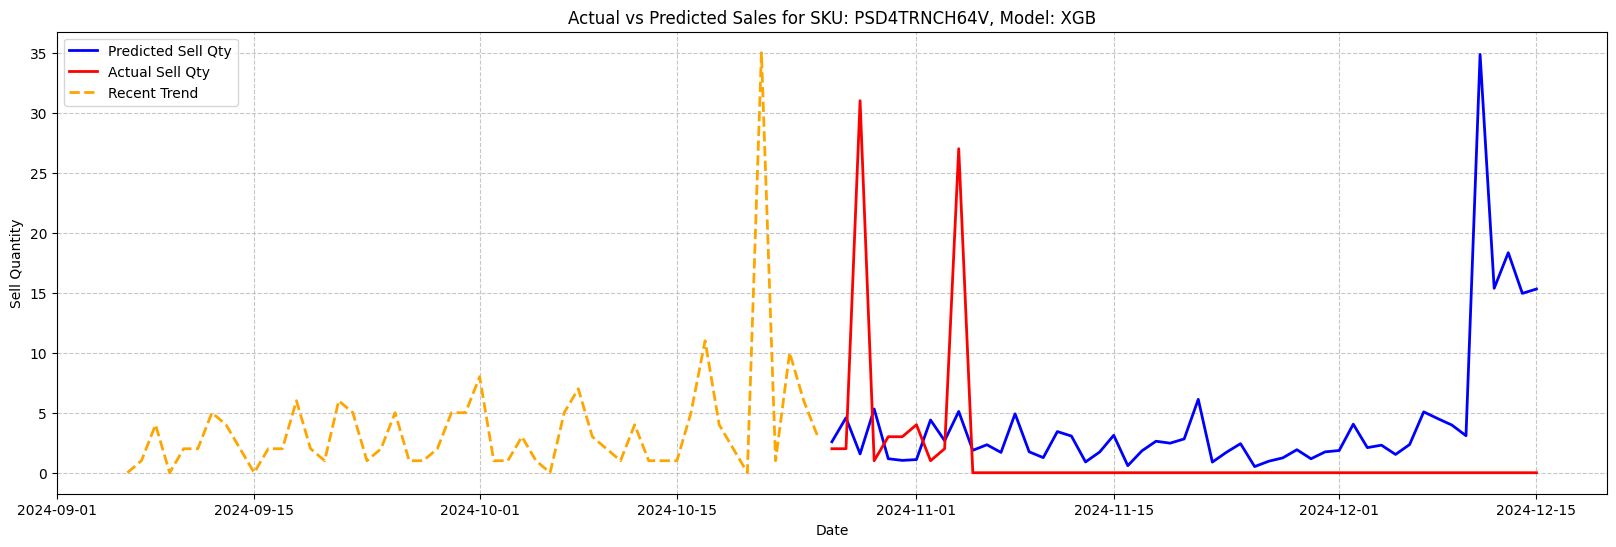

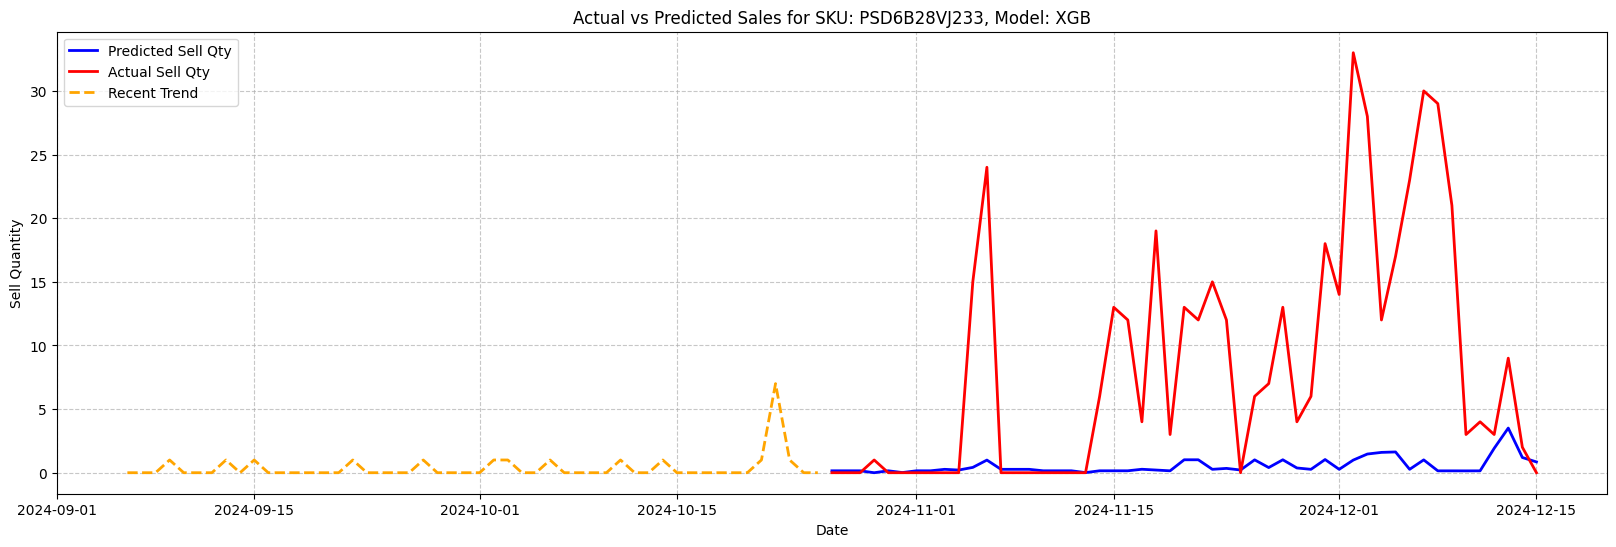

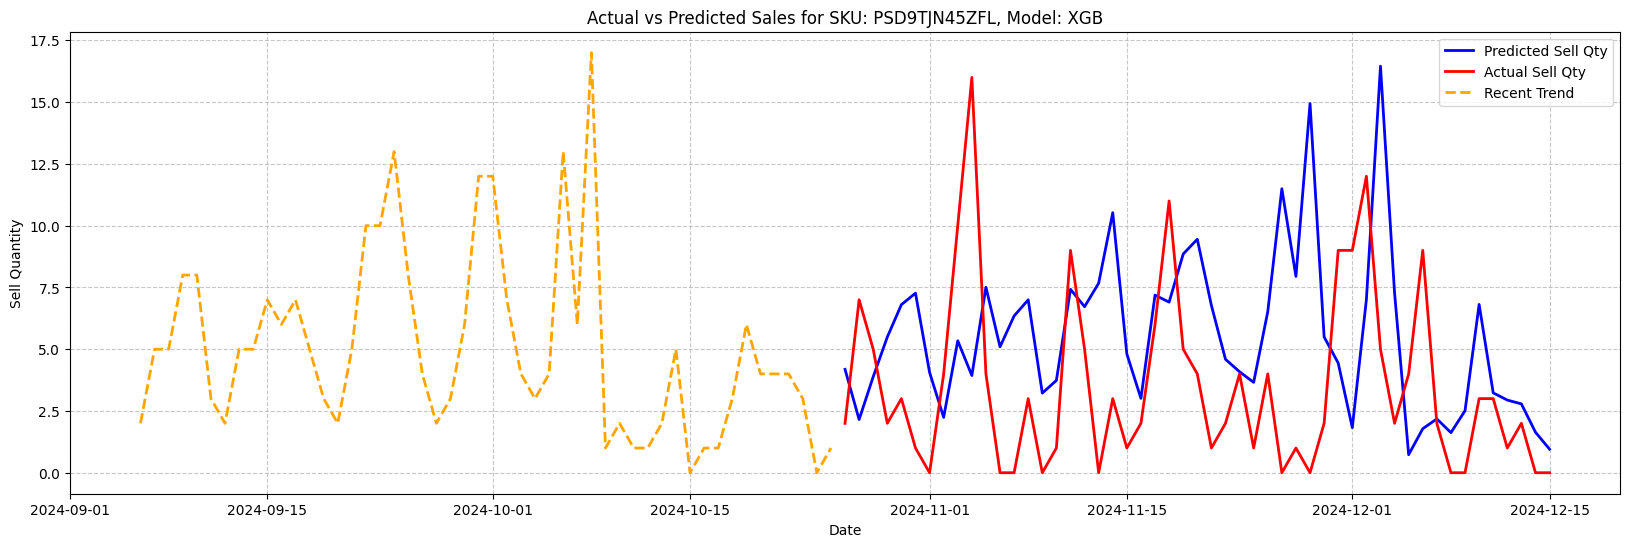

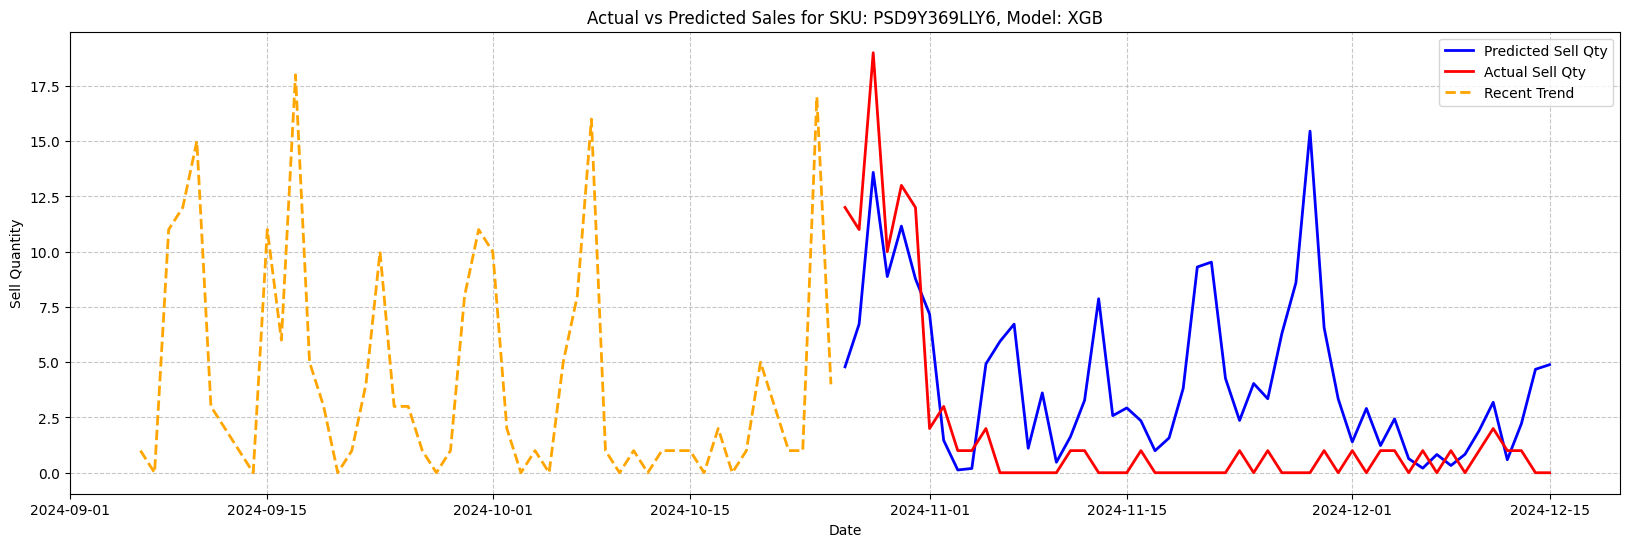

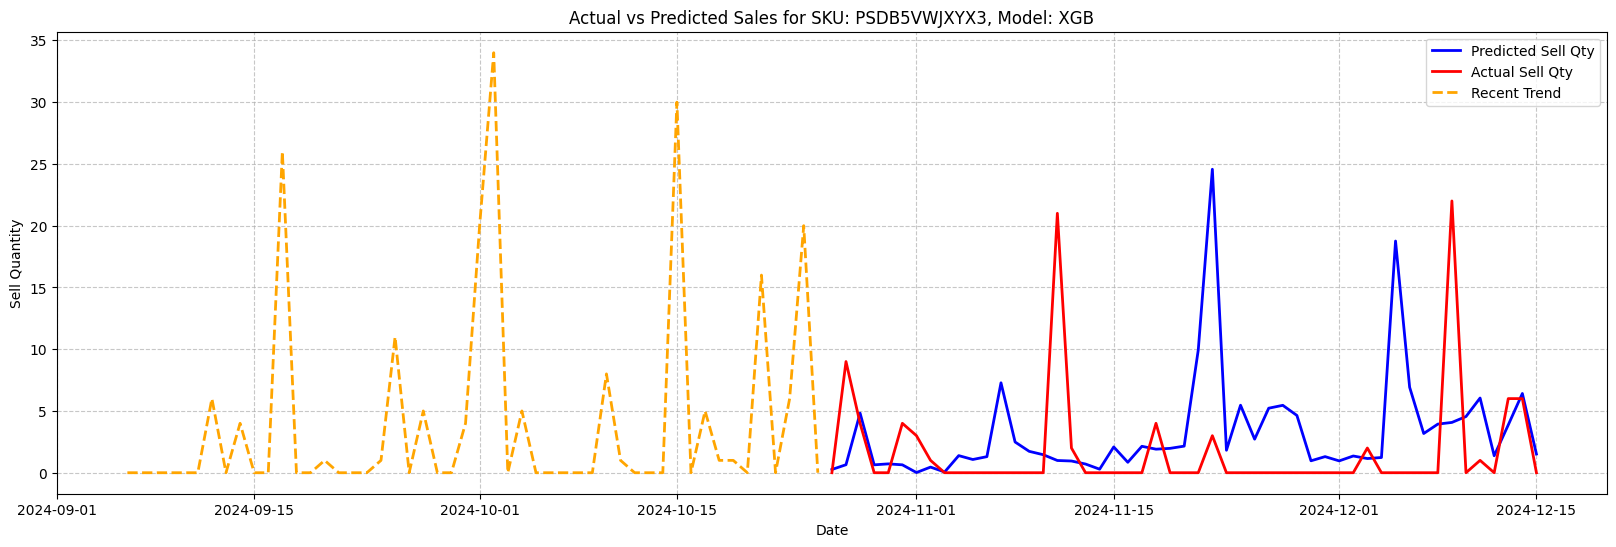

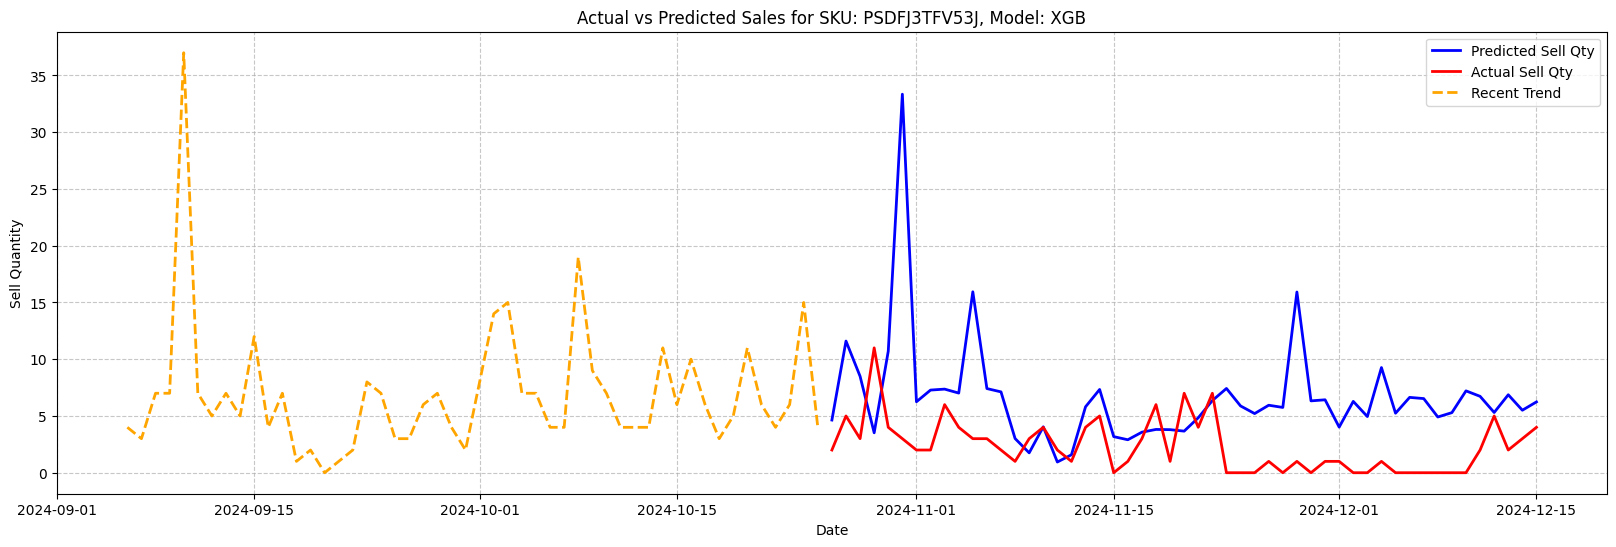

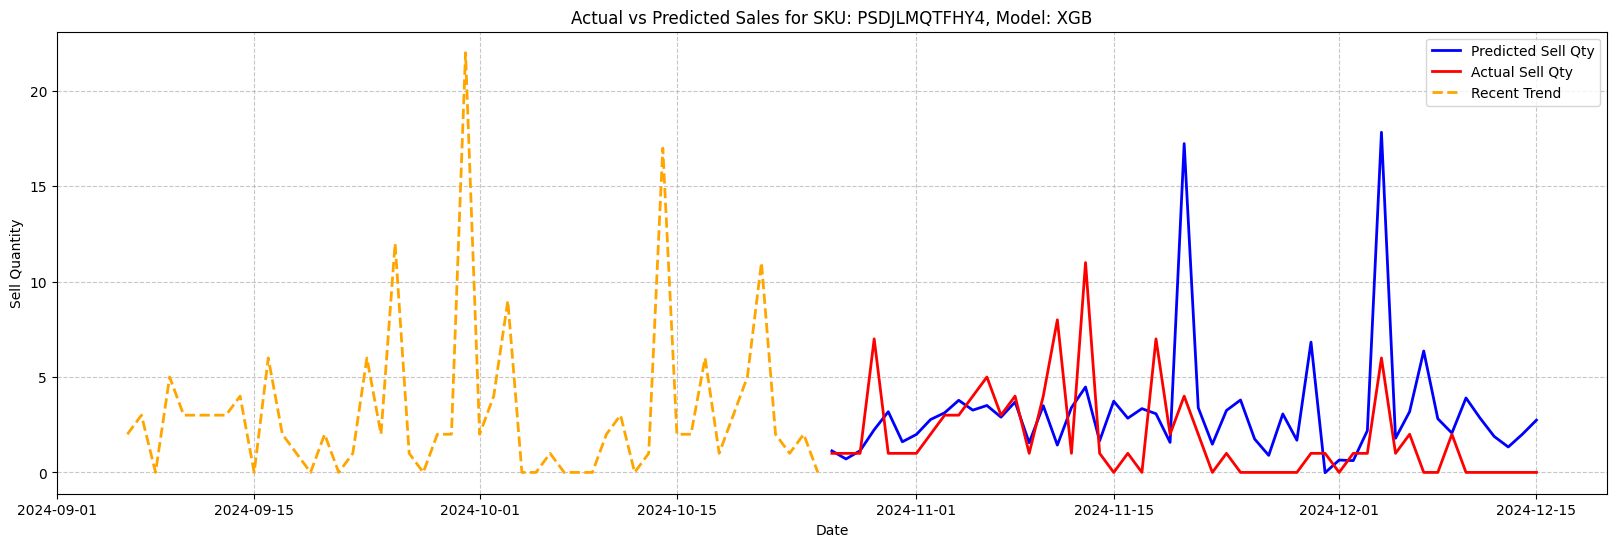

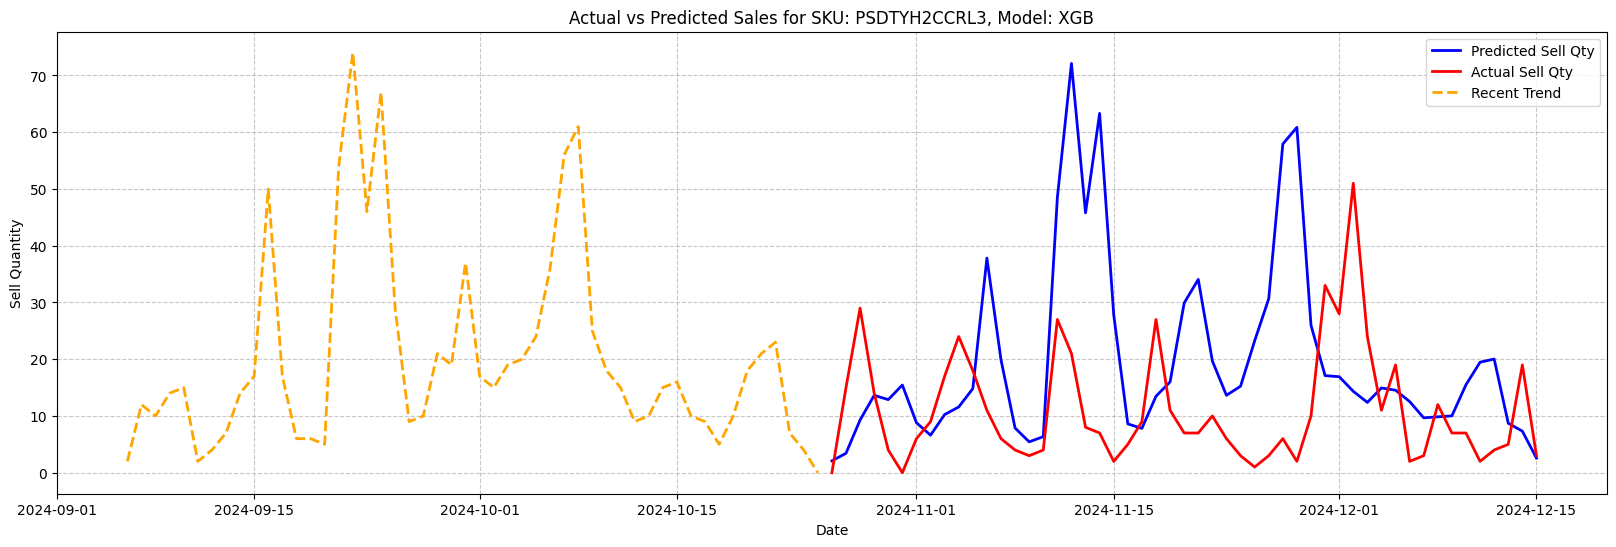

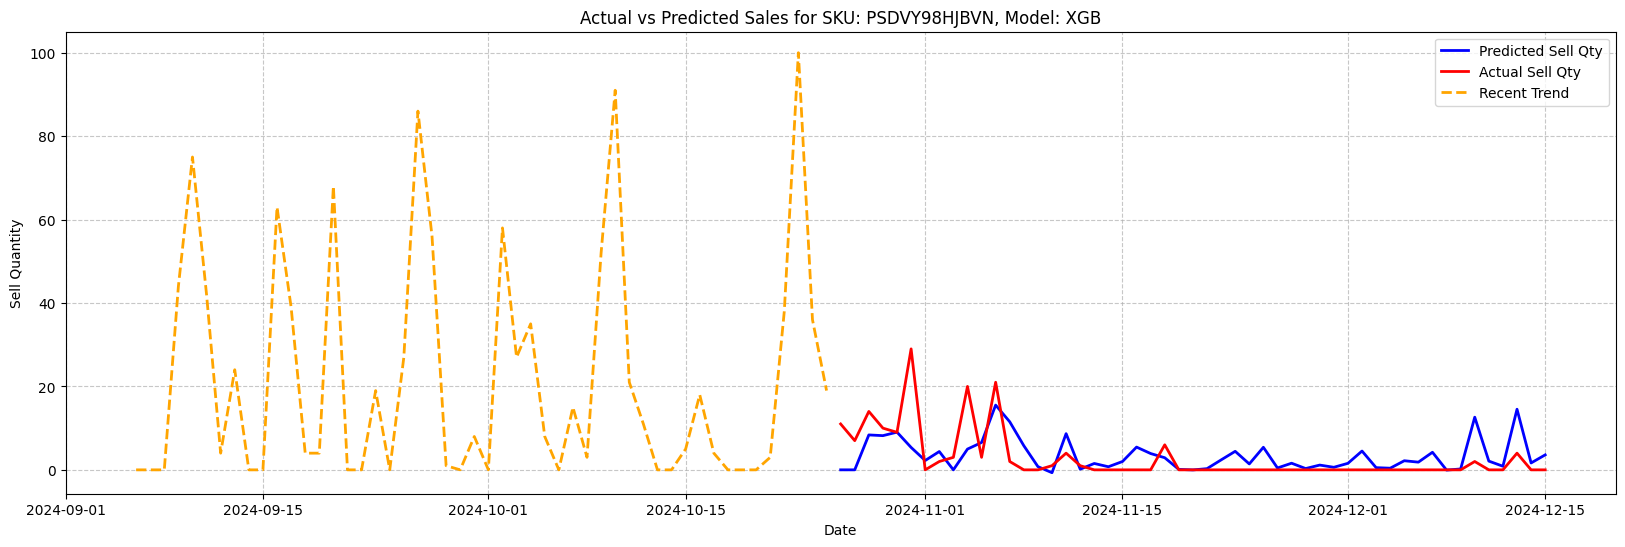

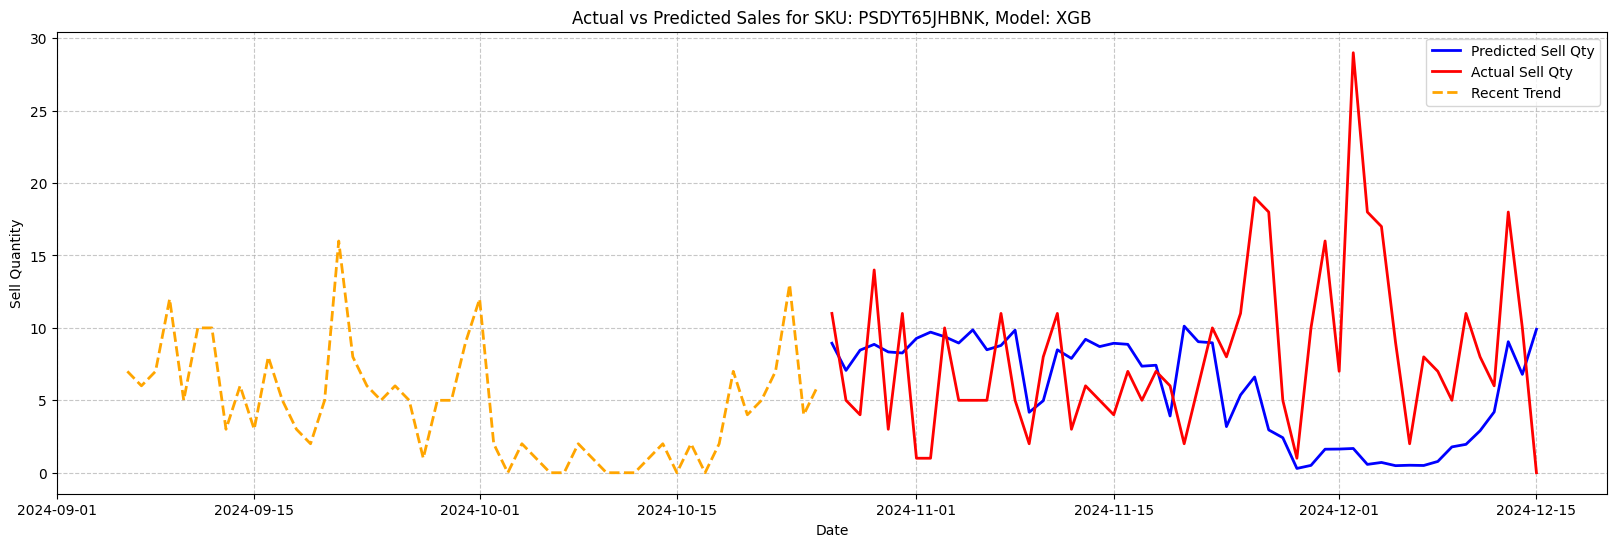

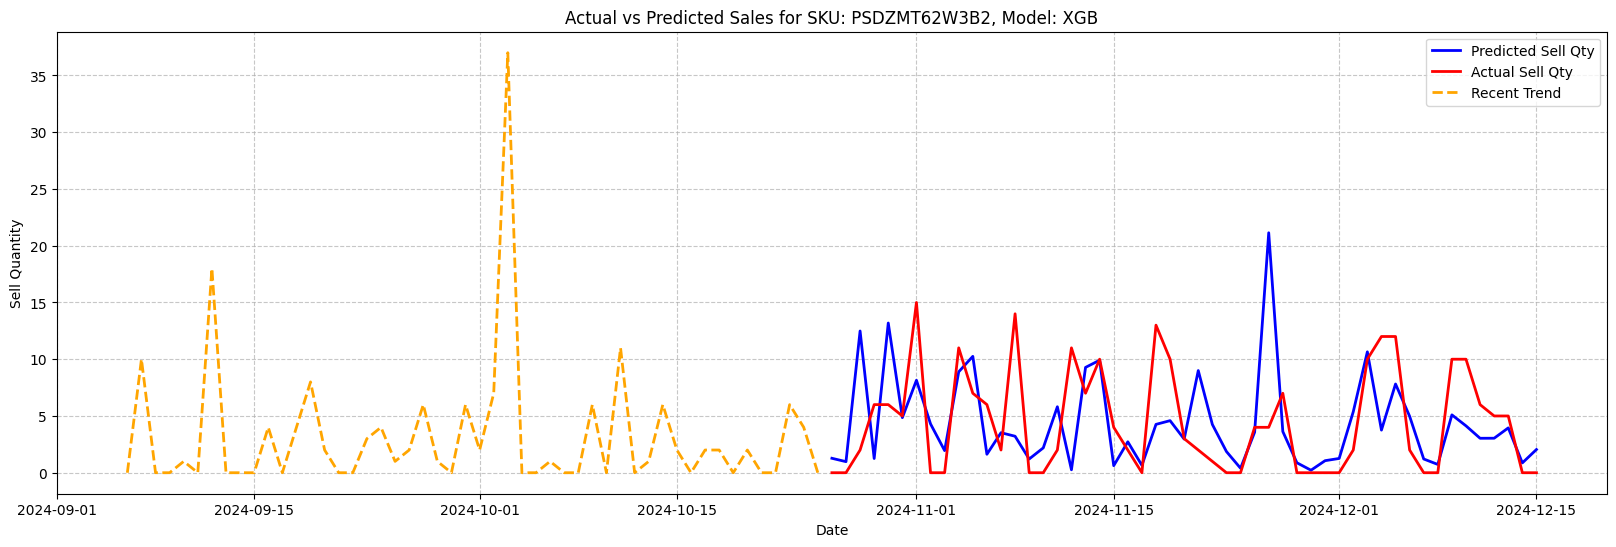

In [18]:
trainer.plot_predictions(predictions=preddictions_xgb,train_df=train_df,model_type='XGB')

In [9]:
xgbmodels = {sku : trainer.train_models_advanced(train_data = train_df, test_data=test_df ,type = prod[prod['sku']==sku]['type'].iloc[0],price =  prod[prod['sku']==sku]['per_unit_cost'].iloc[0],split =True) for sku in current_skus }


[0]	train-rmse:1.32646	eval-rmse:0.46114


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[1]	train-rmse:1.23558	eval-rmse:0.43905
[2]	train-rmse:1.15449	eval-rmse:0.42165
[3]	train-rmse:1.08381	eval-rmse:0.40563
[4]	train-rmse:1.02068	eval-rmse:0.39255
[5]	train-rmse:0.96529	eval-rmse:0.38082
[6]	train-rmse:0.91352	eval-rmse:0.37005
[7]	train-rmse:0.86796	eval-rmse:0.36181
[8]	train-rmse:0.82850	eval-rmse:0.35515
[9]	train-rmse:0.79423	eval-rmse:0.34919
[10]	train-rmse:0.76432	eval-rmse:0.34454
[11]	train-rmse:0.73732	eval-rmse:0.34075
[12]	train-rmse:0.71503	eval-rmse:0.33624
[13]	train-rmse:0.69442	eval-rmse:0.33272
[14]	train-rmse:0.67514	eval-rmse:0.32968
[15]	train-rmse:0.65859	eval-rmse:0.32746
[16]	train-rmse:0.64385	eval-rmse:0.32578
[17]	train-rmse:0.63131	eval-rmse:0.32397
[18]	train-rmse:0.61676	eval-rmse:0.32263
[19]	train-rmse:0.60735	eval-rmse:0.32150
[20]	train-rmse:0.59536	eval-rmse:0.32045
[21]	train-rmse:0.58573	eval-rmse:0.31952
[22]	train-rmse:0.57829	eval-rmse:0.31836
[23]	train-rmse:0.57044	eval-rmse:0.31739
[24]	train-rmse:0.56366	eval-rmse:0.31635
[

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[0]	train-rmse:0.93964	eval-rmse:1.16430
[1]	train-rmse:0.88247	eval-rmse:1.12933
[2]	train-rmse:0.83228	eval-rmse:1.07008
[3]	train-rmse:0.78827	eval-rmse:1.02046
[4]	train-rmse:0.75012	eval-rmse:0.97513
[5]	train-rmse:0.71617	eval-rmse:0.93853
[6]	train-rmse:0.68499	eval-rmse:0.90598
[7]	train-rmse:0.65958	eval-rmse:0.87854
[8]	train-rmse:0.63723	eval-rmse:0.84609
[9]	train-rmse:0.61712	eval-rmse:0.84302
[10]	train-rmse:0.60031	eval-rmse:0.82305
[11]	train-rmse:0.58551	eval-rmse:0.80775
[12]	train-rmse:0.57212	eval-rmse:0.77243
[13]	train-rmse:0.56001	eval-rmse:0.76816
[14]	train-rmse:0.55000	eval-rmse:0.75792
[15]	train-rmse:0.54025	eval-rmse:0.73614
[16]	train-rmse:0.53271	eval-rmse:0.73096
[17]	train-rmse:0.52472	eval-rmse:0.72670
[18]	train-rmse:0.51778	eval-rmse:0.72200
[19]	train-rmse:0.51195	eval-rmse:0.72164
[20]	train-rmse:0.50719	eval-rmse:0.71633
[21]	train-rmse:0.50320	eval-rmse:0.71425
[22]	train-rmse:0.49930	eval-rmse:0.71324
[23]	train-rmse:0.49504	eval-rmse:0.71172
[2

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[29]	train-rmse:0.61074	eval-rmse:0.44214
[30]	train-rmse:0.60394	eval-rmse:0.44178
[31]	train-rmse:0.59547	eval-rmse:0.44180
[32]	train-rmse:0.58719	eval-rmse:0.44133
[33]	train-rmse:0.58100	eval-rmse:0.44125
[34]	train-rmse:0.57552	eval-rmse:0.44127
[35]	train-rmse:0.56991	eval-rmse:0.44124
[36]	train-rmse:0.56479	eval-rmse:0.44119
[37]	train-rmse:0.55859	eval-rmse:0.44123
[38]	train-rmse:0.55434	eval-rmse:0.44105
[39]	train-rmse:0.55128	eval-rmse:0.44104
[40]	train-rmse:0.54723	eval-rmse:0.44105
[41]	train-rmse:0.54094	eval-rmse:0.44089
[42]	train-rmse:0.53591	eval-rmse:0.44087
[43]	train-rmse:0.53225	eval-rmse:0.44088
[44]	train-rmse:0.52726	eval-rmse:0.44089
[45]	train-rmse:0.52536	eval-rmse:0.44163
[46]	train-rmse:0.52008	eval-rmse:0.44149
[47]	train-rmse:0.51707	eval-rmse:0.44157
[48]	train-rmse:0.51586	eval-rmse:0.44157
[49]	train-rmse:0.51253	eval-rmse:0.44157
[50]	train-rmse:0.50859	eval-rmse:0.44168
[51]	train-rmse:0.50603	eval-rmse:0.44156
[52]	train-rmse:0.50235	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[68]	train-rmse:0.37146	eval-rmse:0.50207
[69]	train-rmse:0.36806	eval-rmse:0.50206
[70]	train-rmse:0.36634	eval-rmse:0.50206
[0]	train-rmse:0.91249	eval-rmse:3.70535
[1]	train-rmse:0.84096	eval-rmse:3.58264
[2]	train-rmse:0.77587	eval-rmse:3.48386
[3]	train-rmse:0.71696	eval-rmse:3.40740
[4]	train-rmse:0.66354	eval-rmse:3.33570
[5]	train-rmse:0.61530	eval-rmse:3.28147
[6]	train-rmse:0.57120	eval-rmse:3.23088
[7]	train-rmse:0.53194	eval-rmse:3.18758
[8]	train-rmse:0.49595	eval-rmse:3.15029
[9]	train-rmse:0.46365	eval-rmse:3.11979
[10]	train-rmse:0.43541	eval-rmse:3.04585
[11]	train-rmse:0.41006	eval-rmse:2.98200
[12]	train-rmse:0.38727	eval-rmse:2.90090
[13]	train-rmse:0.36700	eval-rmse:2.85621
[14]	train-rmse:0.34841	eval-rmse:2.79168
[15]	train-rmse:0.33182	eval-rmse:2.73725
[16]	train-rmse:0.31683	eval-rmse:2.70948
[17]	train-rmse:0.30334	eval-rmse:2.67380
[18]	train-rmse:0.29096	eval-rmse:2.64468
[19]	train-rmse:0.27991	eval-rmse:2.61979
[20]	train-rmse:0.26820	eval-rmse:2.59621
[2

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[69]	train-rmse:0.14969	eval-rmse:2.46097
[70]	train-rmse:0.14952	eval-rmse:2.46069
[71]	train-rmse:0.14900	eval-rmse:2.46071
[72]	train-rmse:0.14840	eval-rmse:2.46078
[73]	train-rmse:0.14826	eval-rmse:2.46053
[74]	train-rmse:0.14767	eval-rmse:2.46068
[75]	train-rmse:0.14745	eval-rmse:2.46086
[76]	train-rmse:0.14699	eval-rmse:2.46056
[77]	train-rmse:0.14678	eval-rmse:2.46002
[78]	train-rmse:0.14607	eval-rmse:2.45979
[79]	train-rmse:0.14552	eval-rmse:2.45988
[80]	train-rmse:0.14494	eval-rmse:2.45987
[81]	train-rmse:0.14389	eval-rmse:2.45993
[82]	train-rmse:0.14297	eval-rmse:2.45983
[83]	train-rmse:0.14252	eval-rmse:2.45977
[84]	train-rmse:0.14201	eval-rmse:2.46010
[85]	train-rmse:0.14175	eval-rmse:2.46003
[86]	train-rmse:0.14104	eval-rmse:2.46034
[87]	train-rmse:0.14050	eval-rmse:2.46044
[88]	train-rmse:0.13924	eval-rmse:2.46040
[89]	train-rmse:0.13826	eval-rmse:2.46039
[90]	train-rmse:0.13805	eval-rmse:2.46044
[91]	train-rmse:0.13753	eval-rmse:2.46052
[92]	train-rmse:0.13737	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[29]	train-rmse:0.54975	eval-rmse:0.28584
[30]	train-rmse:0.54419	eval-rmse:0.28581
[31]	train-rmse:0.53637	eval-rmse:0.28565
[32]	train-rmse:0.52972	eval-rmse:0.28550
[33]	train-rmse:0.52379	eval-rmse:0.28559
[34]	train-rmse:0.51927	eval-rmse:0.28577
[35]	train-rmse:0.51196	eval-rmse:0.28575
[36]	train-rmse:0.50704	eval-rmse:0.28568
[37]	train-rmse:0.50278	eval-rmse:0.28560
[38]	train-rmse:0.49698	eval-rmse:0.28555
[39]	train-rmse:0.49261	eval-rmse:0.28585
[40]	train-rmse:0.48886	eval-rmse:0.28580
[41]	train-rmse:0.48614	eval-rmse:0.28567
[42]	train-rmse:0.48171	eval-rmse:0.28562
[43]	train-rmse:0.47884	eval-rmse:0.28553
[44]	train-rmse:0.47445	eval-rmse:0.28554
[45]	train-rmse:0.47253	eval-rmse:0.28546
[46]	train-rmse:0.47080	eval-rmse:0.28544
[47]	train-rmse:0.46745	eval-rmse:0.28545
[48]	train-rmse:0.46531	eval-rmse:0.28545
[49]	train-rmse:0.46327	eval-rmse:0.28538
[50]	train-rmse:0.46235	eval-rmse:0.28518
[51]	train-rmse:0.45918	eval-rmse:0.28519
[52]	train-rmse:0.45781	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[0]	train-rmse:0.86822	eval-rmse:1.09067
[1]	train-rmse:0.81271	eval-rmse:1.04061
[2]	train-rmse:0.76406	eval-rmse:0.99011
[3]	train-rmse:0.72094	eval-rmse:0.95348
[4]	train-rmse:0.68338	eval-rmse:0.91378
[5]	train-rmse:0.65014	eval-rmse:0.88021
[6]	train-rmse:0.62107	eval-rmse:0.85114
[7]	train-rmse:0.59568	eval-rmse:0.83032
[8]	train-rmse:0.57349	eval-rmse:0.81252
[9]	train-rmse:0.55449	eval-rmse:0.79272
[10]	train-rmse:0.53594	eval-rmse:0.77924
[11]	train-rmse:0.52000	eval-rmse:0.77883
[12]	train-rmse:0.50590	eval-rmse:0.77905
[13]	train-rmse:0.49300	eval-rmse:0.78180
[14]	train-rmse:0.48168	eval-rmse:0.77329
[15]	train-rmse:0.47211	eval-rmse:0.76394
[16]	train-rmse:0.46399	eval-rmse:0.75861
[17]	train-rmse:0.45677	eval-rmse:0.75993
[18]	train-rmse:0.44927	eval-rmse:0.75456
[19]	train-rmse:0.44372	eval-rmse:0.74939
[20]	train-rmse:0.43853	eval-rmse:0.74732
[21]	train-rmse:0.43407	eval-rmse:0.74323
[22]	train-rmse:0.42989	eval-rmse:0.74100
[23]	train-rmse:0.42454	eval-rmse:0.73667
[2

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[6]	train-rmse:0.90573	eval-rmse:0.51244
[7]	train-rmse:0.87473	eval-rmse:0.50395
[8]	train-rmse:0.84783	eval-rmse:0.50313
[9]	train-rmse:0.82152	eval-rmse:0.50132
[10]	train-rmse:0.79804	eval-rmse:0.50285
[11]	train-rmse:0.77825	eval-rmse:0.50828
[12]	train-rmse:0.75935	eval-rmse:0.51420
[13]	train-rmse:0.74110	eval-rmse:0.51905
[14]	train-rmse:0.72554	eval-rmse:0.52585
[15]	train-rmse:0.71152	eval-rmse:0.52974
[16]	train-rmse:0.69810	eval-rmse:0.53277
[17]	train-rmse:0.68644	eval-rmse:0.53782
[18]	train-rmse:0.67349	eval-rmse:0.54164
[19]	train-rmse:0.66239	eval-rmse:0.54589
[20]	train-rmse:0.65281	eval-rmse:0.55121
[21]	train-rmse:0.64328	eval-rmse:0.55457
[22]	train-rmse:0.63548	eval-rmse:0.55924
[23]	train-rmse:0.62667	eval-rmse:0.56301
[24]	train-rmse:0.62065	eval-rmse:0.56646
[25]	train-rmse:0.61272	eval-rmse:0.56862
[26]	train-rmse:0.60788	eval-rmse:0.57214
[27]	train-rmse:0.60369	eval-rmse:0.57469
[28]	train-rmse:0.59723	eval-rmse:0.57841
[29]	train-rmse:0.59191	eval-rmse:0.58

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[42]	train-rmse:0.32217	eval-rmse:0.30323
[43]	train-rmse:0.32057	eval-rmse:0.30421
[44]	train-rmse:0.31835	eval-rmse:0.30411
[45]	train-rmse:0.31698	eval-rmse:0.30412
[46]	train-rmse:0.31621	eval-rmse:0.30406
[47]	train-rmse:0.31442	eval-rmse:0.30469
[48]	train-rmse:0.31373	eval-rmse:0.30467
[49]	train-rmse:0.31116	eval-rmse:0.30542
[50]	train-rmse:0.30914	eval-rmse:0.30607
[51]	train-rmse:0.30651	eval-rmse:0.30456
[52]	train-rmse:0.30453	eval-rmse:0.30308
[53]	train-rmse:0.30302	eval-rmse:0.30181
[54]	train-rmse:0.30111	eval-rmse:0.30067
[55]	train-rmse:0.29925	eval-rmse:0.30114
[56]	train-rmse:0.29806	eval-rmse:0.30137
[57]	train-rmse:0.29695	eval-rmse:0.30157
[58]	train-rmse:0.29582	eval-rmse:0.30158
[59]	train-rmse:0.29358	eval-rmse:0.30183
[60]	train-rmse:0.29259	eval-rmse:0.30069
[61]	train-rmse:0.29085	eval-rmse:0.29926
[62]	train-rmse:0.29002	eval-rmse:0.29767
[63]	train-rmse:0.28887	eval-rmse:0.29804
[64]	train-rmse:0.28817	eval-rmse:0.29870
[65]	train-rmse:0.28706	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[26]	train-rmse:0.56234	eval-rmse:0.27291
[27]	train-rmse:0.55596	eval-rmse:0.27279
[28]	train-rmse:0.54762	eval-rmse:0.27275
[29]	train-rmse:0.53897	eval-rmse:0.27326
[30]	train-rmse:0.53179	eval-rmse:0.27328
[31]	train-rmse:0.52193	eval-rmse:0.27328
[32]	train-rmse:0.51370	eval-rmse:0.27327
[33]	train-rmse:0.50683	eval-rmse:0.27339
[34]	train-rmse:0.50040	eval-rmse:0.27326
[35]	train-rmse:0.49427	eval-rmse:0.27325
[36]	train-rmse:0.48845	eval-rmse:0.27316
[37]	train-rmse:0.48351	eval-rmse:0.27309
[38]	train-rmse:0.47864	eval-rmse:0.27309
[39]	train-rmse:0.47499	eval-rmse:0.27325
[40]	train-rmse:0.47000	eval-rmse:0.27315
[41]	train-rmse:0.46588	eval-rmse:0.27310
[42]	train-rmse:0.46165	eval-rmse:0.27308
[43]	train-rmse:0.45987	eval-rmse:0.27309
[44]	train-rmse:0.45630	eval-rmse:0.27306
[45]	train-rmse:0.45456	eval-rmse:0.27307
[46]	train-rmse:0.45186	eval-rmse:0.27307
[47]	train-rmse:0.45027	eval-rmse:0.27310
[48]	train-rmse:0.44879	eval-rmse:0.27305
[49]	train-rmse:0.44751	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/Projects/prophet_present_project/liabraries\training_rf_xgb_models.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['purchase_date'].dt.day
C:\User

[0]	train-rmse:0.96555	eval-rmse:1.18203
[1]	train-rmse:0.90529	eval-rmse:1.10956
[2]	train-rmse:0.85202	eval-rmse:1.04146
[3]	train-rmse:0.80492	eval-rmse:0.98615
[4]	train-rmse:0.76354	eval-rmse:0.94163
[5]	train-rmse:0.72646	eval-rmse:0.90830
[6]	train-rmse:0.69292	eval-rmse:0.87984
[7]	train-rmse:0.66266	eval-rmse:0.85399
[8]	train-rmse:0.63568	eval-rmse:0.83372
[9]	train-rmse:0.61193	eval-rmse:0.81323
[10]	train-rmse:0.59086	eval-rmse:0.79845
[11]	train-rmse:0.57281	eval-rmse:0.78763
[12]	train-rmse:0.55690	eval-rmse:0.78032
[13]	train-rmse:0.54260	eval-rmse:0.78478
[14]	train-rmse:0.52978	eval-rmse:0.77924
[15]	train-rmse:0.51721	eval-rmse:0.77759
[16]	train-rmse:0.50700	eval-rmse:0.77361
[17]	train-rmse:0.49646	eval-rmse:0.77351
[18]	train-rmse:0.48827	eval-rmse:0.77415
[19]	train-rmse:0.48004	eval-rmse:0.77632
[20]	train-rmse:0.47312	eval-rmse:0.77754
[21]	train-rmse:0.46704	eval-rmse:0.77940
[22]	train-rmse:0.46125	eval-rmse:0.78310
[23]	train-rmse:0.45588	eval-rmse:0.78430
[2

In [10]:
pickle_file = 'xgb_models_3_27.pkl'
try:
    with open(f'data/models/{pickle_file}', 'wb') as file:
        pickle.dump(xgbmodels, file)
except Exception as e:
    print(e)

In [11]:
import json

# Dictionary to store all model configurations
model_configs = {}

# Iterate over all models and save their configurations
for sku, booster in xgbmodels.items():
    model_configs[sku] = booster.save_config()  # Get model config as a string

# Save to a JSON file
with open("data/models/xgb_booster_configs_3_27.json", "w") as f:
    json.dump(model_configs, f, indent=4)